#DATA SCIENCE INTERN AT LET'S GROW MORE(LGM)

##Author : Shuvam Chakraborty

#Beginners Level Task-2

#Stock Market Prediction And Forecasting Using Stacked LSTM

**Dataset Link :** https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [42]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#Loading Dataset

ds=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
ds=ds.iloc[::-1]

In [44]:
ds.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [45]:
ds.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [46]:
ds1 = ds.reset_index()['High']

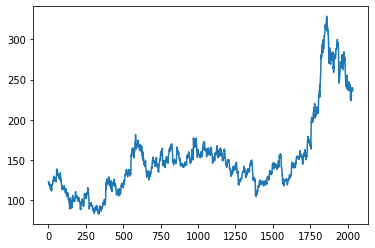

In [47]:
plt.plot(ds1)

##Data Pre-Processing

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
S= MinMaxScaler(feature_range=(0,1))
scaled= S.fit_transform(np.array(ds1).reshape(-1,1))
print(scaled)

[[0.16344786]
 [0.15938199]
 [0.15917869]
 ...
 [0.6391543 ]
 [0.62614353]
 [0.62268754]]


In [50]:
X_train = []
Y_train = []
for i in range(60, 2035):
    X_train.append(scaled[i-60:i, 0])
    Y_train.append(scaled[i-50:i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##Training LSTM Model

In [51]:
from keras.models import Sequential as sq
from keras.layers import Dense as dns
from keras.layers import LSTM
from keras.layers import Dropout as dpout

In [57]:
model = sq()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(dpout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(dpout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(dpout(0.2))
model.add(LSTM(units=50))
model.add(dpout(0.2))
model.add(dns(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 15s 121ms/step - loss: 0.0113
Epoch 2/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0030
Epoch 4/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0027
Epoch 5/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0029
Epoch 6/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0025
Epoch 7/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0024
Epoch 8/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0026
Epoch 9/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0023
Epoch 10/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0027
Epoch 11/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0022
Epoch 12/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0024
Epoch 13/100

In [58]:
ds_test = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
real_stock_price = ds_test.iloc[:, 1:2].values

In [59]:
dataset_total = pd.concat((ds['Open'], ds_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(ds_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = S.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = S.inverse_transform(predicted_stock_price)

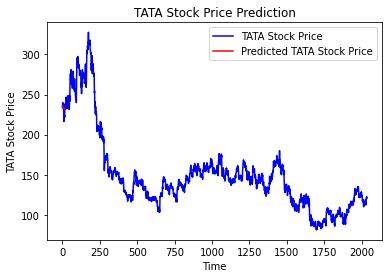

In [60]:
plt.plot(real_stock_price, color = 'blue', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

#Thank You Let's Grow More(LGM)